Analyste Projet

In [3]:
#Dataset de 2021 
import pandas as pd

df = pd.read_excel('Data INP/2022_ChallengeMobilite22.xlsx')
#Ne pas se fier au nom du fichier, il porte sur les données de 2021


In [5]:
# Aperçu des 5 premières lignes
print("Aperçu des premières lignes :")
print(df.head())

# Informations générales sur le DataFrame
print("\nInformations générales :")
print(df.info())

# Statistiques descriptives pour les colonnes numériques
print("\nStatistiques descriptives :")
print(df.describe())

# Dimensions du DataFrame
print("\nDimensions (lignes, colonnes) :")
print(df.shape)

# Liste des colonnes
print("\nListe des colonnes :")
print(df.columns)

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Exploration des types de données
print("\nTypes de données :")
print(df.dtypes)

#Le typage est bon



Aperçu des premières lignes :
   N°Obs                                  1. Vous êtes ?  *  \
0      1                                        Etudiant(e)   
1      2  Personnel (Enseignant, Enseignant-Chercheur, B...   
2      3                                        Etudiant(e)   
3      4                                        Etudiant(e)   
4      5  Personnel (Enseignant, Enseignant-Chercheur, B...   

            2. Lieu de travail * 3. Nom de votre école ?  *  \
0                            NaN                    Ensimag   
1                        Viallet                        NaN   
2                            NaN                    Ensimag   
3                            NaN                    Ensimag   
4  Campus - Saint Martin d'Hères                        NaN   

  4. Quelle est votre commune de résidence ?  *  5. Pied  6. Trotinette  \
0                                        Giered      3.0            NaN   
1                                       crolles      NaN      

In [7]:

# Lignes contenant uniquement des NaN ou None
rows_all_null = df.isnull().all(axis=1)

print("Lignes avec uniquement des valeurs NaN ou None :")
print(df[rows_all_null])

# lignes entièrement nulles
if rows_all_null.any():
    print("\nIl existe des lignes avec uniquement des NaN.")
else:
    print("\nAucune ligne avec uniquement des NaN.")

Lignes avec uniquement des valeurs NaN ou None :
Empty DataFrame
Columns: [N°Obs, 1. Vous êtes ?  *, 2. Lieu de travail *, 3. Nom de votre école ?  *, 4. Quelle est votre commune de résidence ?  *, 5. Pied, 6. Trotinette, 7. Vélo, 8. Bus / Tram, 9. Train, 10. Covoiturage, 11. Télétravail (distance NON parcourue aujourd'hui), 12. Autres, 13. Combien de jour télétravaillez-vous par semaine ?, 14. Quel(s) jour de la semaine ?, 15. Pied, 16. Trotinette ou vélo, 17. Trotinette ou vélo électrique, 18. Tram, 19. Bus, 20. Train, 21. Covoiturage, 22. Moto / Scooter, 23. Voiture électrique, 24. Voiture hybride rechargeable, 25. Voiture à combustible, 26. Autre, 27. Vous covoiturez avec :, 28. Vous covoiturez avec qui, 29. Autre :, 30. Si vous utilisez un véhicule à combustible (auto / moto) avec quelle énergie fonctionne-t'il ?, 31. Puissance fiscale de votre véhicule, 32. Cylindré de votre moto (cm3), 33. Pourquoi avez-vous choisi ce mode de transport pour vous rendre sur votre lieu de travail 

In [9]:
# Les colonnes contenant uniquement des valeurs nulles
empty_columns = df.columns[df.isnull().all()]

print("Colonnes vides (entièrement nulles) :")
print(empty_columns.tolist())

# Vérifier colonnes vides
if not empty_columns.empty:
    print("\nIl existe des colonnes vides dans le DataFrame.")
else:
    print("\nAucune colonne vide dans le DataFrame.")


#Deux colonnes à supprimer


Colonnes vides (entièrement nulles) :
['40. Date de dernière modification', '49. Dernière question saisie']

Il existe des colonnes vides dans le DataFrame.


In [11]:
# Vérifier l'unicité de chque ligne avec le code CLE (un par personne) # Vérifier si tous les éléments d'une colonne sont uniques
column_name = '38. CLE'

# Vérifier si chaque cellule est unique
if df[column_name].is_unique:
    print(f"Toutes les valeurs de la colonne '{column_name}' sont uniques.")
else:
    print(f"La colonne '{column_name}' contient des doublons.")

#On peut donc considérer que chaque ligne correspond à un répondant 

Toutes les valeurs de la colonne '38. CLE' sont uniques.


Le jeu de donné est propre. Toutes les valeurs nulles ou NaN sont gardées pour les besoins de l'analyse.
En revanches, certaines colonnes peuvent être supprimées: '40. Date de dernière modification' et '49. Dernière question saisie': elles sont vides,



In [14]:
# Colonnes à supprimer
columns_to_delete = ["40. Date de dernière modification", "49. Dernière question saisie"]

# Suppression
df = df.drop(columns=columns_to_delete)


In [16]:
df.columns.tolist()

['N°Obs',
 '1. Vous êtes ?  *',
 '2. Lieu de travail *',
 '3. Nom de votre école ?  *',
 '4. Quelle est votre commune de résidence ?  *',
 '5. Pied',
 '6. Trotinette',
 '7. Vélo',
 '8. Bus / Tram',
 '9. Train',
 '10. Covoiturage',
 "11. Télétravail (distance NON parcourue aujourd'hui)",
 '12. Autres',
 '13. Combien de jour télétravaillez-vous par semaine ?',
 '14. Quel(s) jour de la semaine ?',
 '15. Pied',
 '16. Trotinette ou vélo',
 '17. Trotinette ou vélo électrique',
 '18. Tram',
 '19. Bus',
 '20. Train',
 '21. Covoiturage',
 '22. Moto / Scooter',
 '23. Voiture électrique',
 '24. Voiture hybride rechargeable',
 '25. Voiture à combustible',
 '26. Autre',
 '27. Vous covoiturez avec :',
 '28. Vous covoiturez avec qui',
 '29. Autre :',
 "30. Si vous utilisez un véhicule à combustible (auto / moto) avec quelle énergie fonctionne-t'il ?",
 '31. Puissance fiscale de votre véhicule',
 '32. Cylindré de votre moto (cm3)',
 '33. Pourquoi avez-vous choisi ce mode de transport pour vous rendre 

Les éléments 1 à 34 sont les questions qui s'enchaînent. Ceux de 38 à 46 ne suivent pas l'ordre numérique des questions car 
ils ne sont pas des questions mais des éléments annexes indiquant les modalités d'enregistrement d'un questionnaire.

In [19]:
df

,N°Obs,1. Vous êtes ? *,2. Lieu de travail *,3. Nom de votre école ? *,4. Quelle est votre commune de résidence ? *,5. Pied,6. Trotinette,7. Vélo,8. Bus / Tram,9. Train,...,33. Pourquoi avez-vous choisi ce mode de transport pour vous rendre sur votre lieu de travail ?_(3 réponses maximum),34. Autre : :,38. CLE,39. DATE_SAISIE,41. Date de dernier enregistrement,42. Temps de saisie,43. Langue,44. Origine,45. Appareil utilisé pour la saisie,46. Progression
0,1,Etudiant(e),NaN,Ensimag,Giered,3.0,NaN,NaN,NaN,NaN,...,Par habitude;Il est plus rapide,NaN,94UP-XCYR,16/09/2021 08:09:15,16/09/2021 08:18:12,536.299743,FR,Direct,Smartphone,Terminé
1,2,"Personnel (Enseignant, Enseignant-Chercheur, B...",Viallet,NaN,crolles,NaN,NaN,NaN,20.0,NaN,...,Il est plus rapide;Il est économique;Il est pl...,NaN,CHEA-4S7Z,16/09/2021 09:04:08,16/09/2021 09:05:26,77.798551,FR,Direct,PC,Terminé
2,3,Etudiant(e),NaN,Ensimag,Grenoble,NaN,NaN,NaN,5.0,NaN,...,Il est économique;Il est plus écologique,NaN,XBBD-HGZA,17/09/2021 18:07:37,17/09/2021 18:11:52,255.075820,FR,Direct,Smartphone,Terminé
3,4,Etudiant(e),NaN,Ensimag,Saint martin d'heres,NaN,NaN,NaN,3.0,NaN,...,Il est fiable et ponctuel;Il est plus rapide,NaN,ZRNJ-U3CC,17/09/2021 20:28:48,17/09/2021 20:31:34,166.755448,FR,Direct,Tablette,Terminé
4,5,"Personnel (Enseignant, Enseignant-Chercheur, B...",Campus - Saint Martin d'Hères,NaN,Grenoble,1.0,NaN,NaN,6.0,NaN,...,Je n'ai pas le choix;Par habitude,NaN,E9UZ-HJUU,20/09/2021 09:10:15,20/09/2021 09:16:10,354.805955,FR,Direct,PC,Terminé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,731,Etudiant(e),NaN,Phelma,saint martin,1.0,NaN,NaN,2.0,NaN,...,Je n'ai pas le choix,NaN,3AYJ-HBMS,26/09/2021 20:43:19,26/09/2021 20:45:17,118.685733,FR,Direct,PC,Terminé
731,732,"Personnel (Enseignant, Enseignant-Chercheur, B...",Campus - Saint Martin d'Hères,NaN,Plateau des Petites Roches,NaN,NaN,NaN,NaN,NaN,...,Il est plus rapide;Il est plus écologique;Autre :,il est plus social :-),5U5Y-2Z8Y,27/09/2021 15:09:57,27/09/2021 15:12:55,178.547007,FR,Direct,PC,Terminé
732,733,Etudiant(e),NaN,Ensimag,saint martin d'hères,1.0,0.0,0.0,0.0,0.0,...,Par habitude;Il est plus rapide,NaN,26T9-4QXJ,07/10/2021 01:56:12,07/10/2021 02:03:06,414.138518,FR,Direct,PC,Terminé
733,734,"Personnel (Enseignant, Enseignant-Chercheur, B...",Viallet,NaN,Tencin,NaN,NaN,NaN,NaN,50.0,...,Il est plus rapide;Il est économique;Il est pl...,NaN,RTSK-Z7MA,14/10/2021 15:10:07,14/10/2021 15:13:09,181.398220,FR,Direct,Smartphone,Terminé


In [21]:
df.iloc[:, 15:27]  
# Il y a deux parties sur le dataset une dédiée à la journée challenge et l'autre au trajet de la vie quotidienne.
# Nous travaillons sur la deuxième partie.

,15. Pied,16. Trotinette ou vélo,17. Trotinette ou vélo électrique,18. Tram,19. Bus,20. Train,21. Covoiturage,22. Moto / Scooter,23. Voiture électrique,24. Voiture hybride rechargeable,25. Voiture à combustible,26. Autre
0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,40.0,NaN,NaN,NaN
732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN


Construction d'un nouveau dataset pour analyser les mobilités douces :

L'objectif est de créer un nouveau dataset permettant deux types d'analyses :
- Visualisation en secteurs (diagramme circulaire) : Représenter la répartition de l'usage des mobilités douces par les usagers.
- Corrélation : Établir une relation entre la distance moyenne parcourue par un usager pour un mode de transport donné et le choix de ce mode (mesuré par les occurrences des usagers pour chaque mode de transport).

In [24]:
comptage_mode_transport_C = df.iloc[:, 15:27].count()
comptage_mode_transport_2021 = comptage_mode_transport_C.reset_index()
comptage_mode_transport_2021.columns = ['Mode de Transport 2021', 'Occurrences']
comptage_mode_transport_2021['Mode de Transport 2021'] = comptage_mode_transport_2021['Mode de Transport 2021'].str.replace(r'^\d+\.\s*', '', regex=True)
somme_mode_transport = df.iloc[:, 15:27].fillna(0).sum()
comptage_mode_transport_2021['Distance Totale (km)'] = somme_mode_transport.values
comptage_mode_transport_2021['Distance Moyenne (km)'] = (
    comptage_mode_transport_2021['Distance Totale (km)'] /
    comptage_mode_transport_2021['Occurrences']
)
comptage_mode_transport_2021


,Mode de Transport 2021,Occurrences,Distance Totale (km),Distance Moyenne (km)
0,Pied,389,1031.0,2.650386
1,Trotinette ou vélo,376,1634.0,4.345745
2,Trotinette ou vélo électrique,208,129.0,0.620192
3,Tram,383,1197.0,3.125326
4,Bus,232,467.0,2.012931
5,Train,228,1675.0,7.346491
6,Covoiturage,203,175.0,0.862069
7,Moto / Scooter,193,68.0,0.352332
8,Voiture électrique,195,105.0,0.538462
9,Voiture hybride rechargeable,192,26.0,0.135417


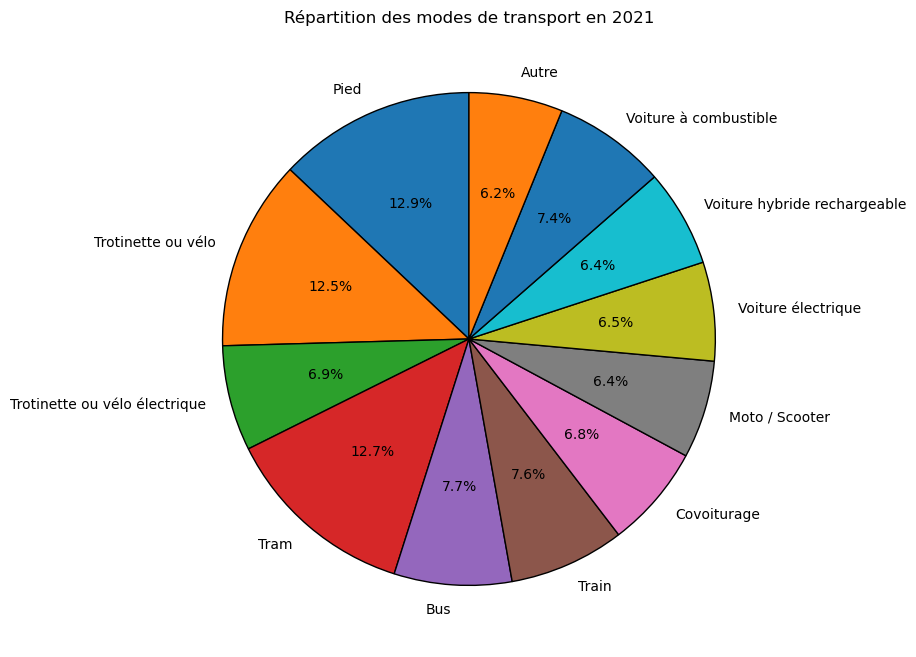

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))  # Taille du graphique
plt.pie(
    comptage_mode_transport_2021['Occurrences'],  # Les données (valeurs)
    labels=comptage_mode_transport_2021['Mode de Transport 2021'],  # Les étiquettes (modes de transport)
    autopct='%1.1f%%',  # Affiche les pourcentages avec 1 chiffre après la virgule
    startangle=90,  # Angle de départ pour un affichage propre
    wedgeprops={'edgecolor': 'black'}  # Bordures noires pour les secteurs
)
plt.title("Répartition des modes de transport en 2021")
plt.show()

Pour les répondants de Grenoble INP, les mobilités douces sont largement majoritaires. Cela peut s'expliquer par plusieurs hypothèses : d'une part, la ville semble déjà favorable aux mobilités douces, avec des infrastructures adaptées et un environnement propice. D'autre part, le profil des répondants, principalement constitué d'étudiants, pourrait introduire un biais. En effet, ce public est généralement plus sensibilisé aux enjeux environnementaux et davantage acquis à la cause des mobilités douces. Par ailleurs, il peut également s'agir d'un public à faible revenu, ce qui pourrait les inciter à privilégier des modes de transport plus économiques, tels que le vélo ou la marche, au détriment de moyens de transport plus coûteux comme la voiture. On peut aussi rajouter l'effet Covid qui a donné un coup de fouet aux mobilités douces.

Regardons si la distance parcourue par un usager sur son trajet quotidien a une influence sur le choix du ou des modes de transport


In [30]:
dfanalyse = df.iloc[:, 15:26].fillna(0.0)
dfanalyse

,15. Pied,16. Trotinette ou vélo,17. Trotinette ou vélo électrique,18. Tram,19. Bus,20. Train,21. Covoiturage,22. Moto / Scooter,23. Voiture électrique,24. Voiture hybride rechargeable,25. Voiture à combustible
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,40.0,0.0,0.0
732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dfanalyse['Distance totale du trajet'] = dfanalyse.sum(axis=1)
dfanalyse

,15. Pied,16. Trotinette ou vélo,17. Trotinette ou vélo électrique,18. Tram,19. Bus,20. Train,21. Covoiturage,22. Moto / Scooter,23. Voiture électrique,24. Voiture hybride rechargeable,25. Voiture à combustible,Distance totale du trajet
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,40.0,0.0,0.0,80.0
732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
733,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0


In [34]:
# Definition des catégories de distance 
def categorize_distance(distance):
    if distance <= 2:
        return "Très courte distance"
    elif 2 < distance <= 5:
        return "Courte distance"
    elif 5 < distance <= 10:
        return "Distance moyenne"
    elif 10 < distance <= 20:
        return "Longue distance"
    else:
        return "Très longue distance"

# Create a new column with the distance category
dfanalyse['Type de trajet'] = dfanalyse['Distance totale du trajet'].apply(categorize_distance)

dfanalyse

,15. Pied,16. Trotinette ou vélo,17. Trotinette ou vélo électrique,18. Tram,19. Bus,20. Train,21. Covoiturage,22. Moto / Scooter,23. Voiture électrique,24. Voiture hybride rechargeable,25. Voiture à combustible,Distance totale du trajet,Type de trajet
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Courte distance
1,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,Longue distance
2,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Courte distance
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Courte distance
4,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Distance moyenne
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Très courte distance
731,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,40.0,0.0,0.0,80.0,Très longue distance
732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Très courte distance
733,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,Très longue distance


In [38]:
count = (dfanalyse['15. Pied'] > 0).sum()
count

289

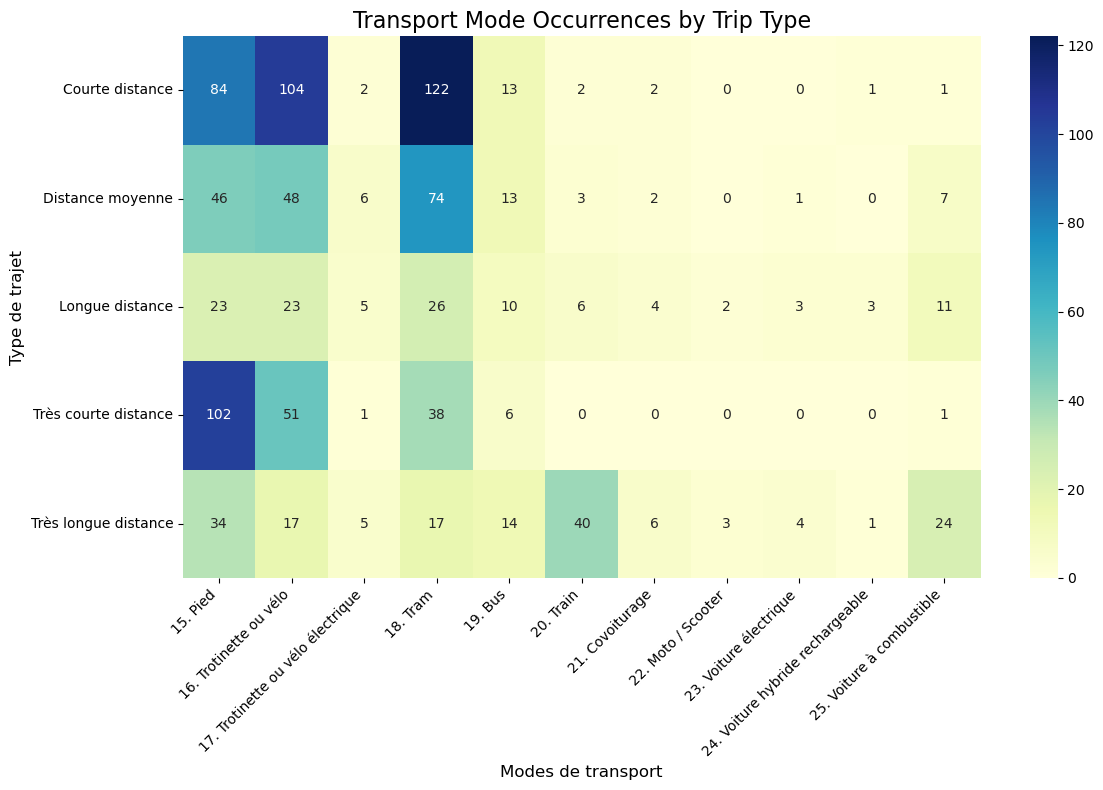

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

colonnes_gardees = dfanalyse.drop(columns=['Distance totale du trajet', 'Type de trajet'])

# Regroupage par 'Type de trajet' et comptage des occurrences (valeurs non égales à 0 ) pour chaque mode de transport
occurrences_transport = dfanalyse.groupby('Type de trajet').apply(lambda group: (group[colonnes_gardees.columns] > 0).sum())

# Visualisation heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(occurrences_transport, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Transport Mode Occurrences by Trip Type", fontsize=16)
plt.ylabel("Type de trajet", fontsize=12)
plt.xlabel("Modes de transport", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

On constate que les mobilités douces sont utilisées pour tous les types de distance. Le train et la voiture surtout pour les
longues distances. On peut estimer que les moyens utilisés pour les mobilités douces sont suffisement importants pour inciter
les habitants à les utiliser pour toutes les distances. Le constat est le même que l'année 2020.